# Minste kvadraters metode

## Tilpasning til datapunkter

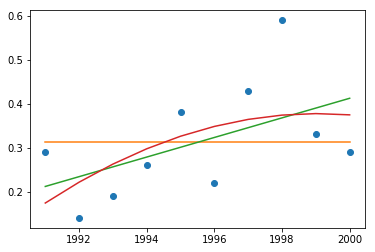

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


tid = np.arange(1, 11)
aar = 1990 + tid
temperaturer = np.array([.29, .14, .19, .26, .38, .22, .43, .59, .33, .29])

# Konstant

alpha = temperaturer.mean()
temp_konst = alpha * np.ones(np.shape(temperaturer))

# Lineær

N = np.shape(temperaturer)[0]
t1sum = tid.sum()
t2sum = (tid**2).sum()
ysum = temperaturer.sum()
ytsum = (temperaturer * tid).sum()

A = np.array([[N, t1sum], [t1sum, t2sum]])
b = np.array([ysum, ytsum])
koeff = np.linalg.solve(A, b)
temp_lin = koeff[0] + koeff[1] * tid

# Kvadratisk

t3sum = (tid**3).sum()
t4sum = (tid**4).sum()
yt2sum = (temperaturer * tid**2).sum()

A = np.array([[N, t1sum, t2sum], [t1sum, t2sum, t3sum], [t2sum, t3sum, t4sum]])
b = np.array([ysum, ytsum, yt2sum])
koeff = np.linalg.solve(A, b)
temp_sq = koeff[0] + koeff[1] * tid + koeff[2] * tid**2

# Plot

plt.plot(aar, temperaturer, 'o')
plt.plot(aar, temp_konst)
plt.plot(aar, temp_lin)
plt.plot(aar, temp_sq)

## Tilpasning til funksjoner

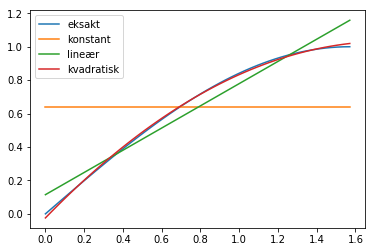

In [2]:
t = np.linspace(0, np.pi / 2)
y = np.sin(t)

# Konstant

alpha = 2 / np.pi
y_konst = alpha * np.ones(np.shape(y))

# Lineær

A = np.array([[np.pi / 2, np.pi**2 / 8], [np.pi**2 / 8, np.pi**3 / 24]])
b = np.array([1, 1])
koeff_lin = np.linalg.solve(A, b)
y_lin = koeff_lin[0] + koeff_lin[1] * t

# Kvadratisk

A = np.array([[np.pi / 2, np.pi**2 / 8, np.pi**3 / 24],
              [np.pi**2 / 8, np.pi**3 / 24, np.pi**4 / 64],
              [np.pi**3 / 24, np.pi**4 / 64, np.pi**5 / 160]])
b = np.array([1, 1, np.pi - 2])
koeff_sq = np.linalg.solve(A, b)
y_sq = koeff_sq[0] + koeff_sq[1] * t + koeff_sq[2] * t**2

# Plot

plt.plot(t, y)
plt.plot(t, y_konst)
plt.plot(t, y_lin)
plt.plot(t, y_sq)
plt.legend(('eksakt', 'konstant', 'lineær', 'kvadratisk'))

## Bruk av scipy

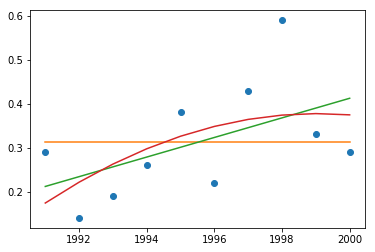

In [3]:
import scipy.optimize

tid = np.arange(1, 11)
aar = 1990 + tid
temperaturer = np.array([.29, .14, .19, .26, .38, .22, .43, .59, .33, .29])

# Konstant

def f_const(x, a):
    return a * np.ones(np.shape(x))

gjett = .5
params, _ = scipy.optimize.curve_fit(f_const, tid, temperaturer, gjett)
temp_const = params[0] * np.ones(np.shape(temperaturer))


# Lineær

def f_lin(x, a, b):
    return a + b * x

gjett = [.5, .5]
params, _ = scipy.optimize.curve_fit(f_lin, tid, temperaturer, gjett)
temp_lin = params[0] + params[1] * tid


# Kvadratisk

def f_sq(x, a, b, c):
    return a + b * x + c * x**2

gjett = [.5, .5, .5]
params, _ = scipy.optimize.curve_fit(f_sq, tid, temperaturer, gjett)
temp_sq = params[0] + params[1] * tid + params[2] * tid**2

# Plot

plt.plot(aar, temperaturer, 'o')
plt.plot(aar, temp_konst)
plt.plot(aar, temp_lin)
plt.plot(aar, temp_sq)